<a href="https://colab.research.google.com/github/Truth300/Truth300/blob/main/Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [298]:
data=pd.read_csv('/content/Fraud_check.csv')
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [299]:
data.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [300]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [302]:
data.shape

(600, 6)

In [303]:
data.ndim

2

In [304]:
data.axes

[RangeIndex(start=0, stop=600, step=1),
 Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
        'Work.Experience', 'Urban'],
       dtype='object')]

In [305]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [306]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [307]:
null=data.isna().sum()
null

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [308]:
print('The dataframe has 0 missing values in Undergrad,Marital Statues,Taxable Income,City Population,Work Experience and Urban')

The dataframe has 0 missing values in Undergrad,Marital Statues,Taxable Income,City Population,Work Experience and Urban


In [309]:
data[data.duplicated()].shape

(0, 6)

In [310]:
data=data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1)
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [311]:
col_names=['Marital_Status','Taxable_Income','Urban']

In [312]:
for val in col_names:
  print(data[val].value_counts())

Marital_Status
Single      217
Married     194
Divorced    189
Name: count, dtype: int64
Taxable_Income
59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: count, Length: 599, dtype: int64
Urban
YES    302
NO     298
Name: count, dtype: int64


In [313]:
conditions=[data['Taxable_Income']<=30000,data['Taxable_Income']>30000]
choices=['Risky','Good']
data['Taxable_Income']=np.select(conditions,choices)
data.head(20)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


In [314]:
label_data=data['Taxable_Income'].value_counts()
label_data

Taxable_Income
Good     476
Risky    124
Name: count, dtype: int64

In [315]:
expl=(0.1,0.1)

ValueError: could not convert string to float: 'NO'

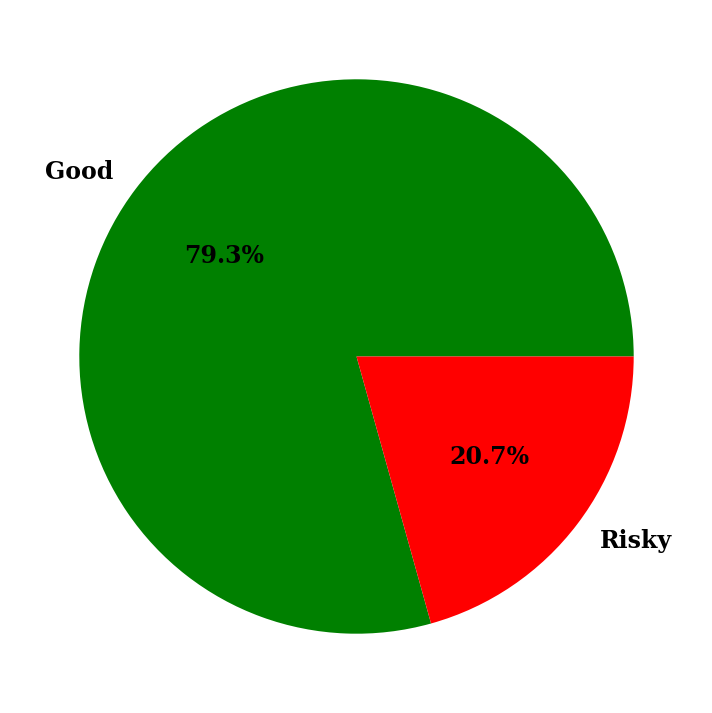

In [316]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))
pets = plt.pie(label_data, labels=label_data.index, colors=['green', 'red'],
               autopct='%1.1f%%', textprops={'fontsize': 17, 'color': 'black', 'weight': 'bold', 'family': 'serif'})
plt.pie(data, autopct="%1.1f%%", startangle=90, explode=expl)
plt.setp(pets, color='white')
hfont = {'weight': 'bold', 'family': 'serif'}
plt.title('Radio of Taxable income', size=20, **hfont)
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.legend(['Good','Risky'],loc="upper right")
plt.show()

In [317]:
continue_col=['City_Population','Work_Experience']
category=['Marital_Status','Taxable_Income','Urban']

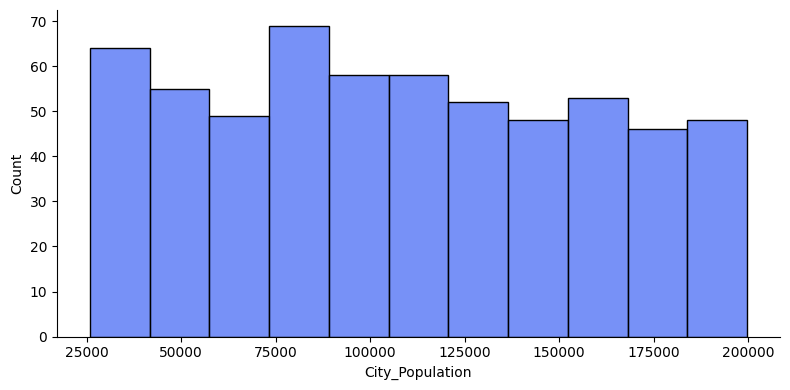

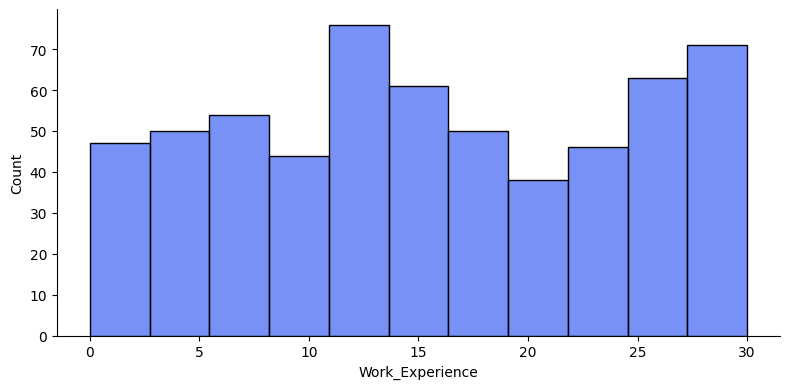

In [318]:
for val in continue_col:
  sns.displot(data=data, x=val, height=4,aspect=2 ,color='#496DF5')
  plt.show()

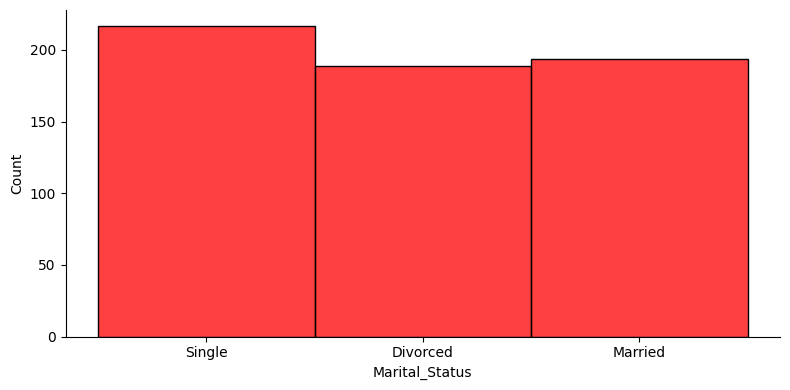

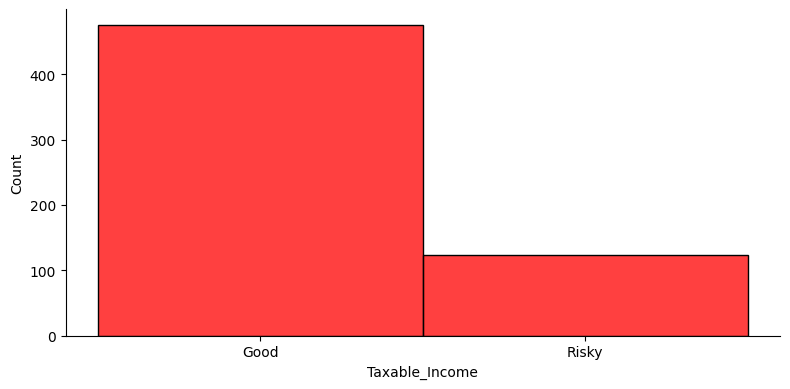

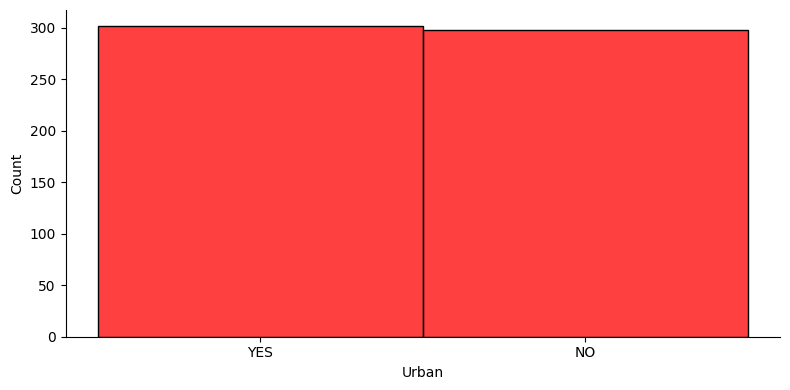

In [319]:
palette='deep'
for cols in category:
  sns.displot(data=data,x=cols,height=4,aspect=2,color='red',palette=palette)
  plt.show()

In [320]:
data = pd.get_dummies(data, columns=['Urban', 'Undergrad'], drop_first=True)
data.head(5)

,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban_YES,Undergrad_YES
0,Single,Good,50047,10,True,False
1,Divorced,Good,134075,18,True,True
2,Married,Good,160205,30,True,False
3,Single,Good,193264,15,True,True
4,Married,Good,27533,28,False,False


In [321]:
from sklearn.preprocessing import LabelEncoder
string_columns=['Marital_Status','Taxable_Income']

In [322]:
number=LabelEncoder()
for i in string_columns:
  data[i]=number.fit_transform(data[i])
data.head()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban_YES,Undergrad_YES
0,2,0,50047,10,True,False
1,0,0,134075,18,True,True
2,1,0,160205,30,True,False
3,2,0,193264,15,True,True
4,1,0,27533,28,False,False


In [323]:
data.tail()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban_YES,Undergrad_YES
595,0,0,39492,7,True,True
596,0,0,55369,2,True,True
597,0,0,154058,0,True,False
598,1,0,180083,17,False,True
599,0,0,158137,16,False,False


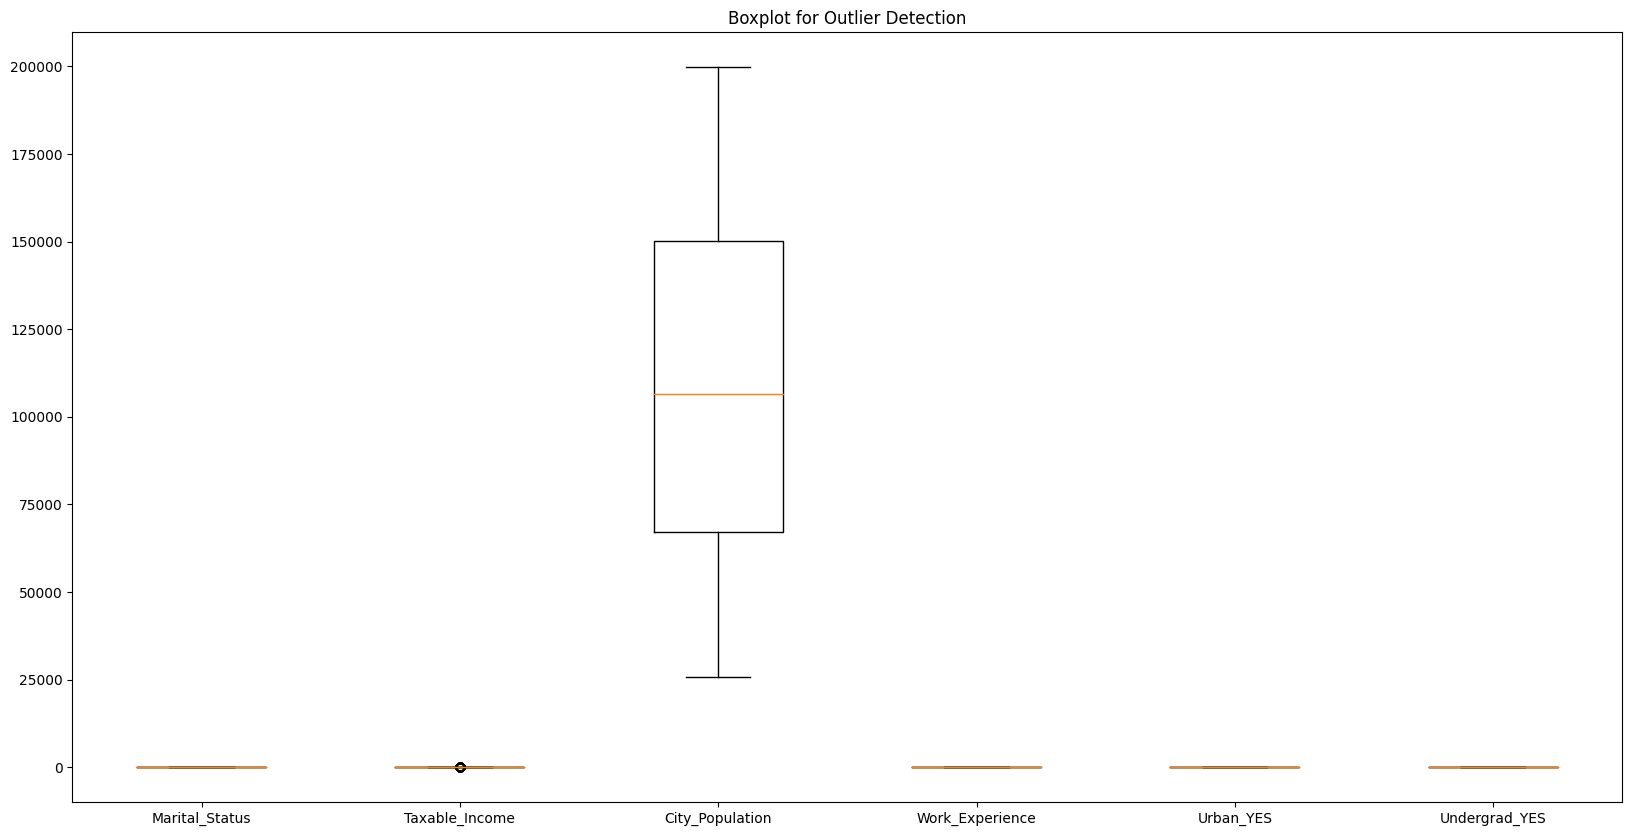

In [324]:
plt.figure(figsize=(20, 10))
plt.boxplot(data, labels=['Marital_Status', 'Taxable_Income', 'City_Population', 'Work_Experience', 'Urban_YES', 'Undergrad_YES'])
plt.title('Boxplot for Outlier Detection')
plt.show()

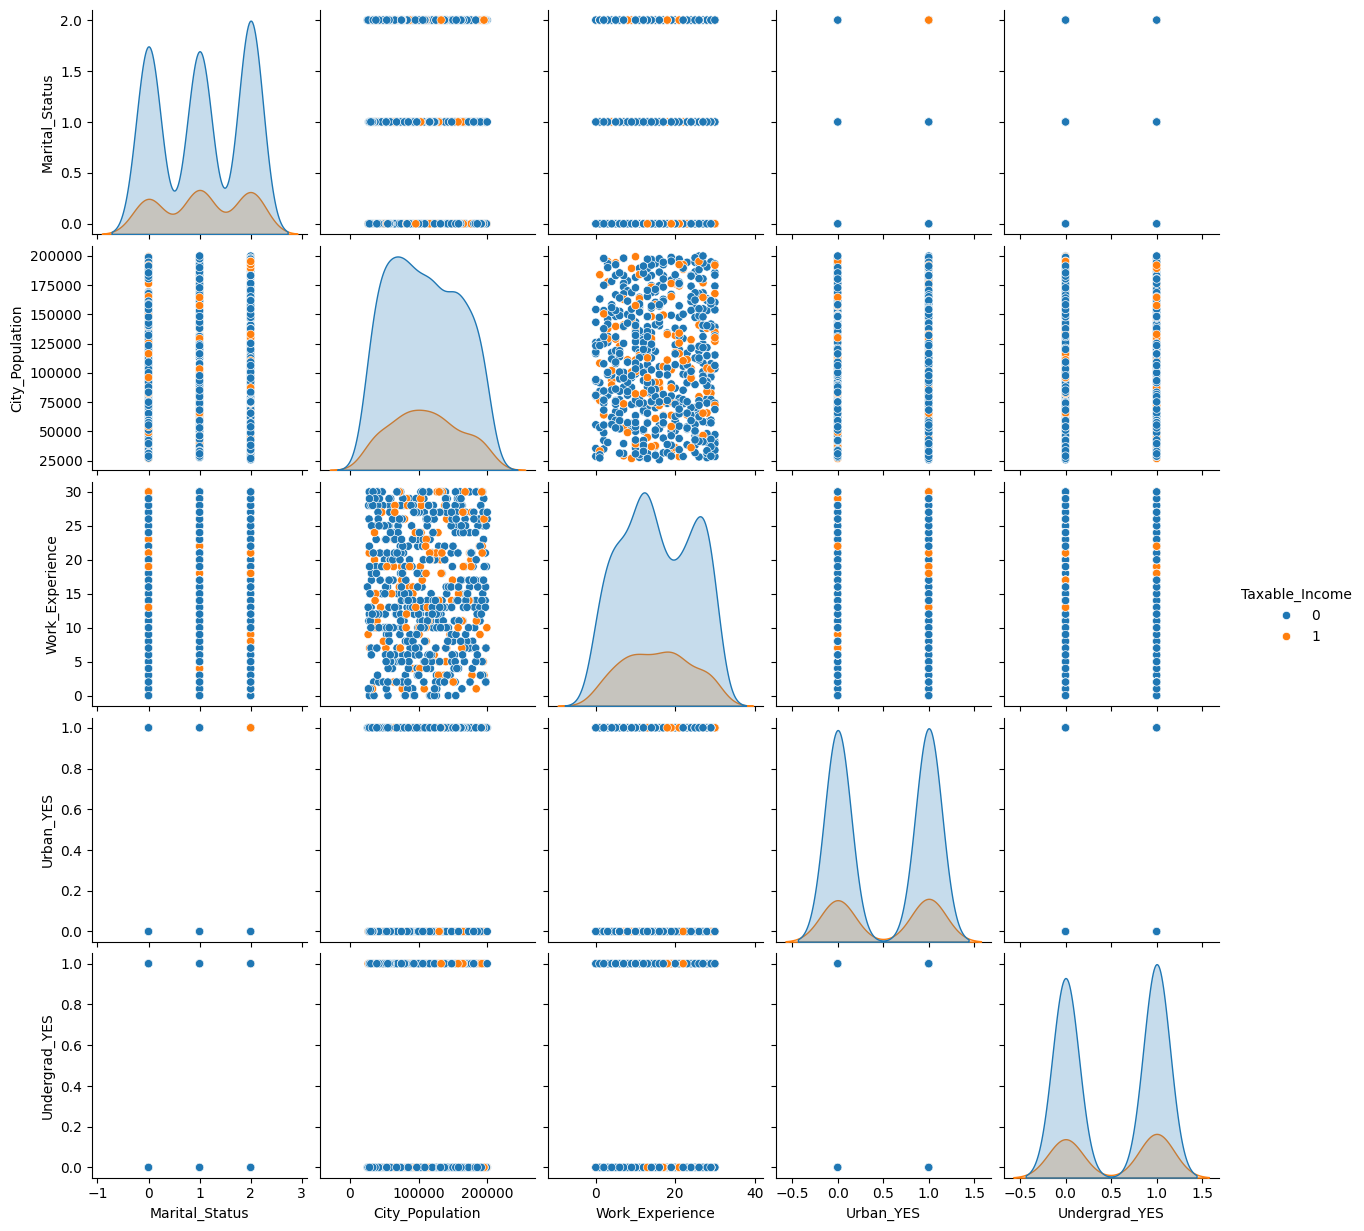

In [325]:
sns.pairplot(data=data,hue='Taxable_Income')
plt.show()

<Axes: >

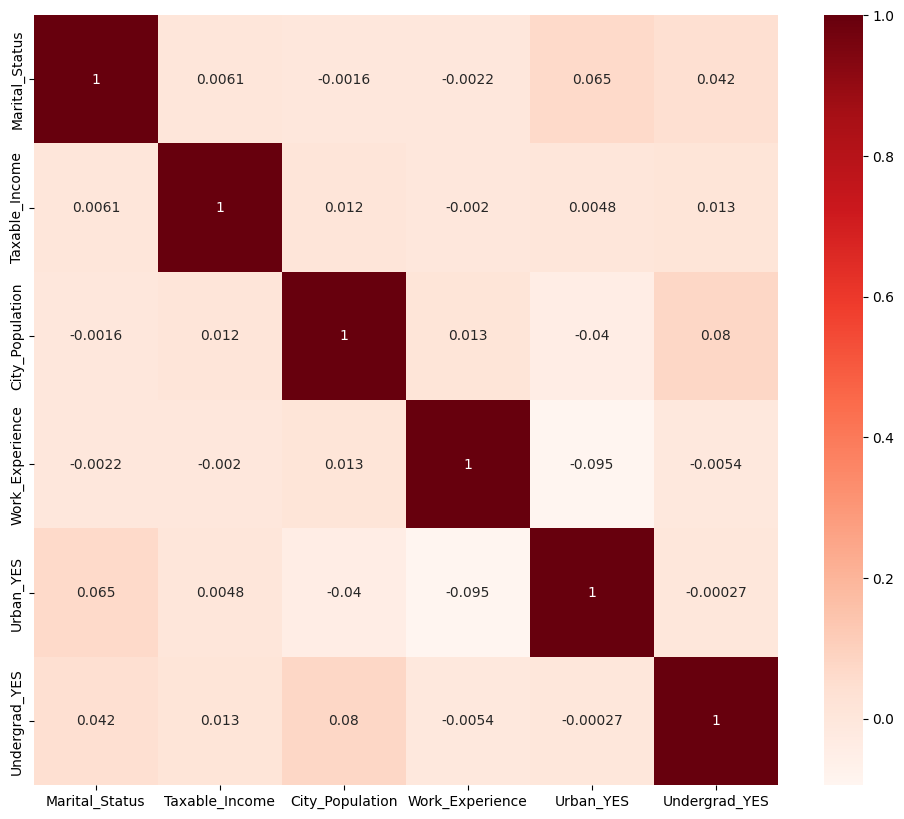

In [326]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)

In [327]:
x=data.drop(['Taxable_Income'],axis=1)
x.head()

,Marital_Status,City_Population,Work_Experience,Urban_YES,Undergrad_YES
0,2,50047,10,True,False
1,0,134075,18,True,True
2,1,160205,30,True,False
3,2,193264,15,True,True
4,1,27533,28,False,False


In [328]:
y=data['Taxable_Income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Taxable_Income, dtype: int64

In [329]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [330]:
ms=StandardScaler()
x=pd.DataFrame(ms.fit_transform(x))
x.head()

,0,1,2,3,4
0,1.160800,-1.178521,-0.629143,0.993355,-1.040833
1,-1.274445,0.508500,0.276370,0.993355,0.960769
2,-0.056822,1.033109,1.634639,0.993355,-1.040833
3,1.160800,1.696831,-0.063197,0.993355,0.960769
4,-0.056822,-1.630532,1.408261,-1.006689,-1.040833


In [331]:
n_fold=KFold(10)
rf_model=RandomForestClassifier()
result=cross_val_score(rf_model,x,y,cv=n_fold)
result

array([0.75      , 0.73333333, 0.66666667, 0.68333333, 0.75      ,
       0.63333333, 0.85      , 0.68333333, 0.76666667, 0.81666667])

In [337]:
result.mean()

0.7333333333333333

In [338]:
result.std()

0.06454972243679029

In [343]:
rf_Mdel=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4)
results=cross_val_score(rf_Model,x,y,cv=n_fold)
results.mean()

0.7933333333333332

In [340]:
results.std()

0.06289320754704403

In [342]:
rf_Mdel=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3)
results=cross_val_score(rf_Model,x,y,cv=n_fold)
results.mean()

0.7933333333333332

In [341]:
results.std()

0.06289320754704403